In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Binarizer, OneHotEncoder, OrdinalEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway
from sklearn.impute import SimpleImputer
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway

In [3]:
df = pd.read_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/Final_Upwork_Dataset.csv')

In [4]:
pd.set_option('display.max_columns', 200)



In [5]:
df.sample(10)

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent($),Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
30804,Build me a custom shopify Site,https://www.upwork.com/jobs/Build-custom-shopi...,NaN,NaN,Developer,1 day ago,Build me a custom shopify site with custom des...,https://www.upwork.com/nx/jobs/search/?ontolog...,Web Development,Web Development,https://www.upwork.com/nx/jobs/search/?ontolog...,Ecommerce Website,https://www.upwork.com/nx/jobs/search/?ontolog...,Shopify,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 to 50,Payment unverified,NaN,1,0.0,Canada,8.0,16.0,NaN,0.0,Fixed-price,"$1,500",NaN,0,NaN
10148,Web Design and Development for Artist - Square...,https://www.upwork.com/jobs/Web-Design-and-spa...,Expert,NaN,Developer,3 hours ago,"Hi, I'm an artist and I am looking for a skill...",https://www.upwork.com/nx/jobs/search/?ontolog...,Web Development,Development,https://www.upwork.com/nx/jobs/search/?ontolog...,User Flow,https://www.upwork.com/nx/jobs/search/?ontolog...,Graphic Design,https://www.upwork.com/nx/jobs/search/?ontolog...,Website Redesign,https://www.upwork.com/nx/jobs/search/?ontolog...,Mobile App Design,https://www.upwork.com/nx/jobs/search/?ontolog...,Shopify,https://www.upwork.com/nx/jobs/search/?ontolog...,Squarespace,https://www.upwork.com/nx/jobs/search/?ontolog...,Mockup,NaN,NaN,10 to 15,Payment verified,NaN,1,800.0,United States,6.0,12.0,NaN,1.0,Fixed-price,"$1,500",NaN,0,NaN
32053,Project Manager (Software Development),https://www.upwork.com/jobs/Project-Manager-So...,NaN,NaN,Developer,2 days ago,We are seeking a highly skilled and experience...,https://www.upwork.com/nx/jobs/search/?ontolog...,Project Management,Development,https://www.upwork.com/nx/jobs/search/?ontolog...,Milestones,https://www.upwork.com/nx/jobs/search/?ontolog...,Decision Making,https://www.upwork.com/nx/jobs/search/?ontolog...,Time Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 to 50,Payment verified,NaN,1,30000.0,United States,8.0,16.0,5.000000,2.0,Hourly,NaN,$65-$75,$65,$75
38811,Shopify online store,https://www.upwork.com/jobs/Shopify-online-sto...,Expert,NaN,Developer,3 days ago,Hi!\nWe are launching a new online store for a...,https://www.upwork.com/nx/jobs/search/?ontolog...,Shopify,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Web Design,https://www.upwork.com/nx/jobs/search/?ontolog...,Shopify Apps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 to 50,Payment unverified,NaN,1,0.0,Indonesia,4.0,8.0,NaN,0.0,Hourly,NaN,$20.00-$40.00,$20.00,$40.00
18342,Can you fix issue of image not loading,https://www.upwork.com/jobs/Can-you-fix-issue-...,Intermediate,"Less than 1 month, Less than 30 hrs/week",Developer,2 days ago,I have website build up in the asp.net\nThere ...,https://www.upwork.com/nx/jobs/search/?ontolog...,C#,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,ASP.NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 to 50,Payment verified,NaN,1,200.0,India,4.0,8.0,4.932692,19.0,Hourly,NaN,$15-$45,$15,$45
59494,Marketing,https://www.upwork.com/jobs/span-Marketing-spa...,Intermediate,"1 to 3 months, not_sure",Marketing,7 hours ago,"for independent pharmacy, facebook marketing a...",https://www.upwork.com/nx/jobs/search/?ontolog...,Social Media Marketing,Marketing,https://www.upwork.com/nx/jobs/search/?ontolog...,Marketing Strategy,https://www.upwork.com/nx/jobs/search/?ontolog...,Content Marketing,https://www.upwork.com/nx/jobs/search/?ontolog...,Facebook,https://www.upwork.com/nx/jobs/search/?ontolog...,Content 

In [6]:
columns = df.columns
columns

Index(['Job Title', 'Job_URL', 'EX_level_demand', 'Time_Limitation',
       'Search_Keyword', 'Posted_from', 'Description', 'Category1_URL_search',
       'Category_1', 'highlight', 'Category2_URL_search', 'Category_2',
       'Category3_URL_search', 'Category_3', 'Category4_URL_search',
       'Category_4', 'Category5_URL_search', 'Category_5',
       'Category6_URL_search', 'Category_6', 'Category7_URL_search',
       'Category_7', 'Category8_URL_search', 'Category_8',
       'Category9_URL_search', 'Category_9', 'Applicants_Num',
       'Payment_Situation', 'Enterprise_Client', 'Freelancers_Num', 'Spent($)',
       'Client_Country', 'Connects_Num', 'New_Connects_Num', 'Rating',
       'Feedback_Num', 'Payment_type', 'Job_Cost', 'Hourly_Rate', 'Start_rate',
       'End_rate'],
      dtype='object')

In [7]:
# Clean Start_rate and End_rate columns
df['Start_rate'] = df['Start_rate'].str.replace('$', '').astype(float)
df['End_rate'] = df['End_rate'].str.replace('$', '').astype(float)

In [8]:
#impute start rate value
null_start_rate = df[df['Start_rate'].isnull()]
display(null_start_rate)

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent($),Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
63949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(null_start_rate.index, inplace=True)

In [10]:
null_end_rate = df[df['Hourly_Rate'].notnull() & df['End_rate'].isnull()]

display(null_end_rate)




,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent($),Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200.0,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,$40.00,40.0,NaN
124,Natural Language Processing Coach,https://www.upwork.com/jobs/Natural-Language-P...,Expert,"1 to 3 months, Less than 30 hrs/week",Data_science,6 hours ago,Job Title: Natural Language Processing Coach\n...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Science,Science,https://www.upwork.com/nx/jobs/search/?ontolog...,Natural Language Processing,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Neural Network,https://www.upwork.com/nx/jobs/search/?ontolog...,Deep Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,English,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,90.0,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,$100.00,100.0,NaN
139,Data Mining and Data Entry,https://www.upwork.com/jobs/span-Data-span-Min...,Intermediate,"Less than 1 month, Less than 30 hrs/week",Data_science,6 hours ago,I am looking for someone to collect contact in...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Entry,Data,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Mining,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Scraping,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50+,Payment verified,NaN,1,700.0,United States,2.0,4.0,5.000000,4.0,Hourly,NaN,$7.00,7.0,NaN
299,Predictive ai models,https://www.upwork.com/jobs/Predictive-models_...,Intermediate,"More than 6 months, 30+ hrs/week",Data_science,21 hours ago,all you will be doing is building machine-lear...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Science,Data Science,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,https://www.upwork.com/nx/jobs/search/?ontolog...,TensorFlow,https://www.upwork.com/nx/jobs/search/?ontolog...,Deep Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python Scikit-Learn,https://www.upwork.com/nx/jobs/search/?ontolog...,deeplearn.js,https://www.upwork.com/nx/jobs/search/?ontolog...,Neural Network,5 to 10,Payment verified,NaN,1,10000.0,United States,6.0,12.0,3.818664,29.0,Hourly,NaN,$3.00,3.0,NaN
406,Train the virtual assistant to understand the ...,https://www.upwork.com/jobs/Train-the-virtual-...,Entry level,"1 to 3 months, not_sure",Data_science,1 day ago,We are looking for freelancers with a good com...,https://www.upwork.com/nx/jobs/search/?ontolog...,English,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Linguistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 to 10,Payment verified,NaN,1,0.0,Georgia,4.0,8.0,NaN,0.0,Hourly,NaN,$3.00,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [11]:
print(null_end_rate.size)

#24887 cases where there is not start and end rate

24887


In [12]:
endRateNull = df[df['Hourly_Rate'].str.contains('-') & df['End_rate'].isnull()]
display(endRateNull)

#so no missing values for actual cases where we need an average

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent($),Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate


In [13]:
df['End_rate'] = df['End_rate'].fillna(0)


In [14]:
display(df[['Payment_type','Hourly_Rate','Start_rate', 'End_rate' ]].head(10))


,Payment_type,Hourly_Rate,Start_rate,End_rate
0,Fixed-price,NaN,0.0,0.0
1,Fixed-price,NaN,0.0,0.0
2,Hourly,$40.00,40.0,0.0
3,Hourly,$35.00-$100.00,35.0,100.0
4,Hourly,NaN,0.0,0.0
5,Hourly,$75.00-$175.00,75.0,175.0
6,Hourly,NaN,0.0,0.0
7,Fixed-price,NaN,0.0,0.0
8,Hourly,$25.00-$35.00,25.0,35.0
9,Hourly,NaN,0.0,0.0


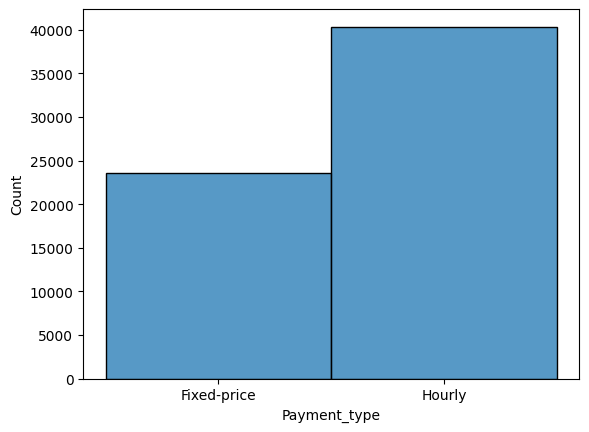

In [15]:
missing = df['Payment_type'].isnull().sum()
sns.histplot(df['Payment_type'])
plt.show()


In [16]:
#for all hourly cases, impute the hourly rate based on start and end rate
#display(df.loc[df['Payment_type']== 'Hourly'].loc[df['Hourly_Rate'].notnull()][['Hourly_Rate','Start_rate', 'End_rate']].head(10))

##df.loc[df['Payment_type']== 'Hourly'].loc[df['Hourly_Rate'].notnull()].loc[df['Start_rate'] > df['End_rate'], 'Hourly_Rate'] = df['Start_rate']

#df[['Hourly_Rate','Start_rate', 'End_rate']].head(10)

new_hourly = df[['Hourly_Rate','Start_rate', 'End_rate']]


new_hourly.loc[(new_hourly['Hourly_Rate'].notnull() & (new_hourly['Start_rate'] > new_hourly['End_rate'])), 'Hourly_Rate'] = new_hourly['Start_rate']
new_hourly.loc[(new_hourly['Hourly_Rate'].notnull() & (new_hourly['Start_rate'] < new_hourly['End_rate'])), 'Hourly_Rate'] = abs(new_hourly['Start_rate'] + new_hourly['End_rate'])/2

new_hourly.drop(columns=['Start_rate','End_rate'], inplace=True)
new_hourly.head(10)

df['Hourly_Rate'] = new_hourly['Hourly_Rate']


/var/folders/7_/ldhwzhy97q3_dwy4nqwpndt00000gn/T/ipykernel_24900/1385761482.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hourly.drop(columns=['Start_rate','End_rate'], inplace=True)


In [17]:
df['Job_Cost'] = df['Job_Cost'].str.replace('$','').str.replace(',','').astype(float)
df[['Payment_type','Job_Cost','Hourly_Rate']].head(10)



,Payment_type,Job_Cost,Hourly_Rate
0,Fixed-price,2500.0,NaN
1,Fixed-price,200.0,NaN
2,Hourly,NaN,40.0
3,Hourly,NaN,67.5
4,Hourly,NaN,NaN
5,Hourly,NaN,125.0
6,Hourly,NaN,NaN
7,Fixed-price,10.0,NaN
8,Hourly,NaN,30.0
9,Hourly,NaN,NaN


In [18]:
print(df.shape)

(63949, 41)


In [19]:
df.loc[df['Job_Cost'].isnull() & df['Hourly_Rate'].isnull()].shape

(17266, 41)

In [20]:
print(df['Job_Cost'].notnull().sum())
print(df['Hourly_Rate'].notnull().sum())

20113
26570


We have 63949 total examples. Of these 17266 are missing completely missing price value (no Job_Cost no Hourly_rate) 


That means we have 46683 examples with either Job_Cost or Hourly_Rate (Hence we have price data for 73% of the examples)


From these 46683 examples, 20113 have fixed Job_Cost and 26570 have Hourly_Rate



Either we impute the 27% missing values from the 73% or we drop them.


In [21]:

df.drop(columns=['Start_rate','End_rate'], inplace=True)



In [22]:
df.columns

Index(['Job Title', 'Job_URL', 'EX_level_demand', 'Time_Limitation',
       'Search_Keyword', 'Posted_from', 'Description', 'Category1_URL_search',
       'Category_1', 'highlight', 'Category2_URL_search', 'Category_2',
       'Category3_URL_search', 'Category_3', 'Category4_URL_search',
       'Category_4', 'Category5_URL_search', 'Category_5',
       'Category6_URL_search', 'Category_6', 'Category7_URL_search',
       'Category_7', 'Category8_URL_search', 'Category_8',
       'Category9_URL_search', 'Category_9', 'Applicants_Num',
       'Payment_Situation', 'Enterprise_Client', 'Freelancers_Num', 'Spent($)',
       'Client_Country', 'Connects_Num', 'New_Connects_Num', 'Rating',
       'Feedback_Num', 'Payment_type', 'Job_Cost', 'Hourly_Rate'],
      dtype='object')

<Axes: ylabel='Job_Cost'>

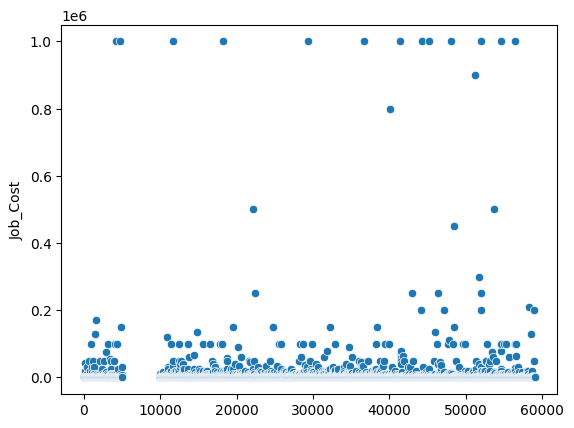

In [23]:
sns.scatterplot(df['Job_Cost'])

In [24]:
#df.loc[df['Job_Cost'] > 1e6*0.4].shape
#only 18 cases so we drop everything above 1e60.4

df.drop(df.loc[df['Job_Cost'] > 1e6*0.4].index, axis=0, inplace=True)

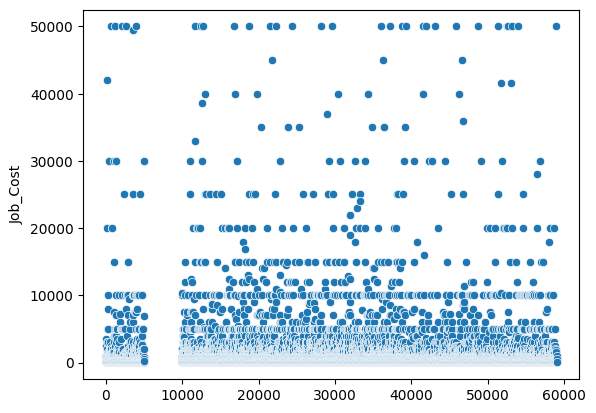

mean:  963.2530475619504 , median:  150.0


In [25]:

df.drop(df.loc[df['Job_Cost'] > 50000].index, axis=0, inplace=True)
sns.scatterplot(df['Job_Cost'])

plt.show()


print(
        'mean: ', df['Job_Cost'].mean(), 
        ', median: ', df['Job_Cost'].median(), 
        
    )

#mean and median differnece not too crazy, we'll assume uniformity

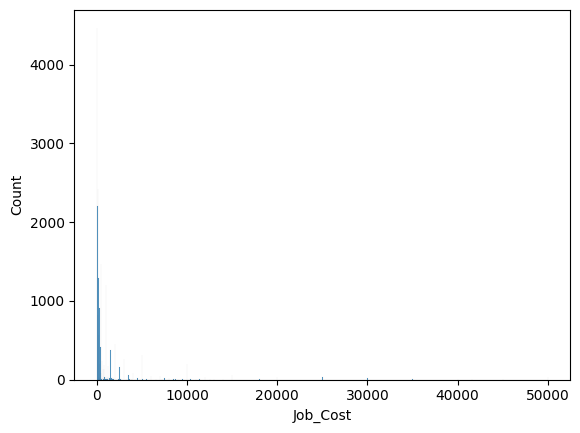

In [26]:
sns.histplot(df['Job_Cost'])
plt.show()


In [27]:
df['Hourly_Rate'] = df['Hourly_Rate'].astype(float)
print(df['Hourly_Rate'].dtype)


float64


<Axes: ylabel='Hourly_Rate'>

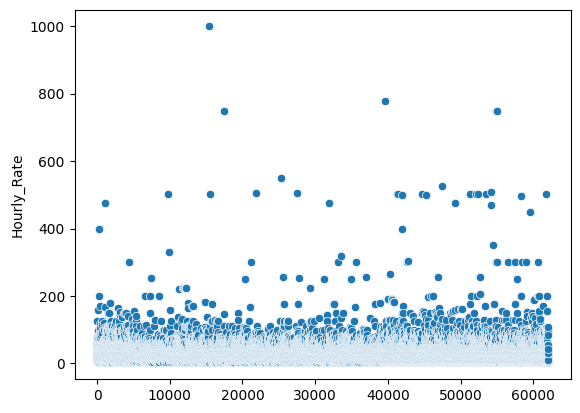

In [28]:
sns.scatterplot(df['Hourly_Rate'])

mean:  29.622632254169496 , median:  24.0


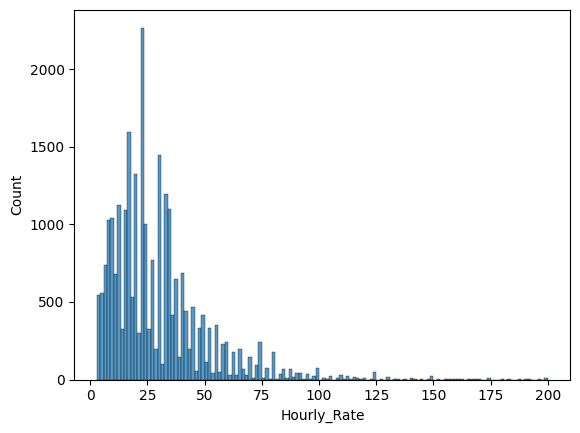

In [29]:
df.drop(df.loc[df['Hourly_Rate'] > 200].index, axis=0, inplace=True)
sns.histplot(df['Hourly_Rate'])

print(
        'mean: ', df['Hourly_Rate'].mean(), 
        ', median: ', df['Hourly_Rate'].median(), 
        
    )

#mean and median not too much different so we have good enough uniformity

In [30]:
def visual_numerical_feature(feature):
    sns.histplot(df[feature], kde=True)
    plt.title("{} Distribution".format(feature))
    plt.show()
    print(
        'mean ', df[feature].mean(),
        '\nmedian ', df[feature].median(),
        '\nRelative differnce ', (df[feature].mean()-df[feature].median())/np.sqrt(df[feature].var())
    )

    

    sns.boxplot(x=df[feature])

    print('IQR no. of outliers: ')

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    num_outliers = outliers.shape[0]
    print(num_outliers)

    print("Box plot: ")

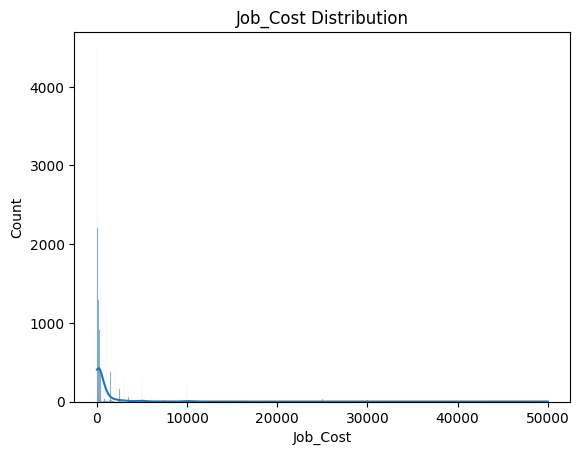

mean  963.2530475619504 
median  150.0 
Relative differnce  0.24252604481027296
IQR no. of outliers: 
2760
Box plot: 


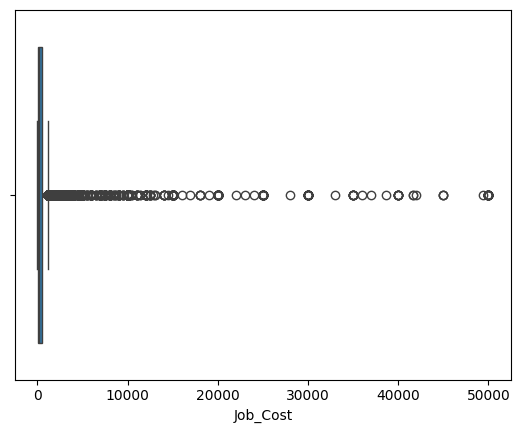

In [31]:
visual_numerical_feature('Job_Cost')

Realative differnce is still smaller than 0.3 though which is a good indication of uniformity. 

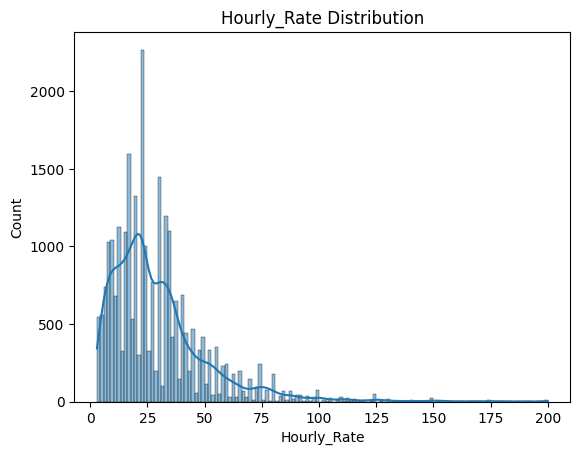

mean  29.622632254169496 
median  24.0 
Relative differnce  0.2572287193184595
IQR no. of outliers: 
1389
Box plot: 


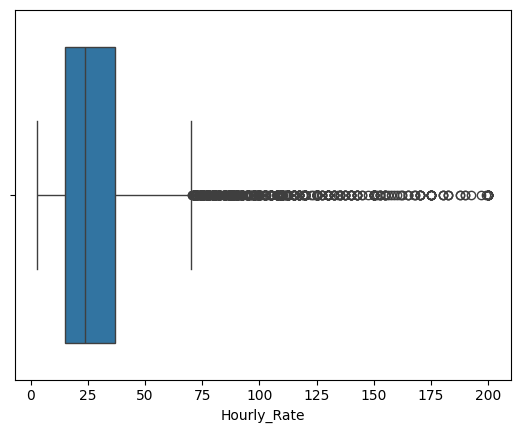

In [32]:
visual_numerical_feature('Hourly_Rate')

In [33]:
df.head(10)

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent($),Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Visualization,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Power BI,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment unverified,NaN,1,0.0,United States,6.0,12.0,NaN,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Tableau,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Excel,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft PowerPoint,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,https://www.upwork.com/nx/jobs/search/?ontolog...,Analytics,https://www.upwork.com/nx/jobs/search/?ontolog...,Visualization,NaN,NaN,Less than 5,Payment verified,NaN,1,100.0,Canada,4.0,8.0,5.000000,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200.0,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200000.0,Canada,6.0,12.0,4.935536,26.0,Hourly,NaN,67.5
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,https://www.upwork.com/nx/jobs/search/?ontolog...,Looker,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Snowflake,https://www.upwork.com/nx/jobs/search/?ontolog...,Accounting,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,Enterprise,1,NaN,United States,6.0,12.0,4.942242,12512.0,Hourly,NaN,NaN
5,Computer vision / machine learning: synthetic ...,https://www.upwork.com/jobs/Computer-vision-ma...,Expert,"1 to 3 months, Less than 30 hrs/week",Data_science,15 minutes ago,Our company is working on a government proposa...,https://www.upwork.com/nx/jobs/search/?ontolog...,Generativ

Hourly rate and job cost values cleaned. Remaining is to impute the missing values.


We have 63949 total examples. Of these 17266 are missing completely missing price value (no Job_Cost no Hourly_rate) 


That means we have 46683 examples with either Job_Cost or Hourly_Rate (Hence we have price data for 73% of the examples)


From these 46683 examples, 20113 have fixed Job_Cost and 26570 have Hourly_Rate



Either we impute the 27% missing values from the 73% or we drop them.

Next will clean connects num. Will drop old connects number and impute missing values for new connects number.

In [34]:
df[['Connects_Num', 'New_Connects_Num']].isnull().sum()

Connects_Num        0
New_Connects_Num    0
dtype: int64

In [35]:
df.drop(['Connects_Num'], axis=1, inplace=True)


In [36]:
df.rename(columns={'Spent($)':'Spent'}, inplace=True)




In [37]:
df.rename(columns={'New_Connects_Num':'Connects'}, inplace=True)
df.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent,Client_Country,Connects,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Visualization,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Power BI,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment unverified,NaN,1,0.0,United States,12.0,NaN,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Tableau,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Excel,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft PowerPoint,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,https://www.upwork.com/nx/jobs/search/?ontolog...,Analytics,https://www.upwork.com/nx/jobs/search/?ontolog...,Visualization,NaN,NaN,Less than 5,Payment verified,NaN,1,100.0,Canada,8.0,5.000000,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200.0,United States,12.0,5.000000,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200000.0,Canada,12.0,4.935536,26.0,Hourly,NaN,67.5
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,https://www.upwork.com/nx/jobs/search/?ontolog...,Looker,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Snowflake,https://www.upwork.com/nx/jobs/search/?ontolog...,Accounting,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,Enterprise,1,NaN,United States,12.0,4.942242,12512.0,Hourly,NaN,NaN


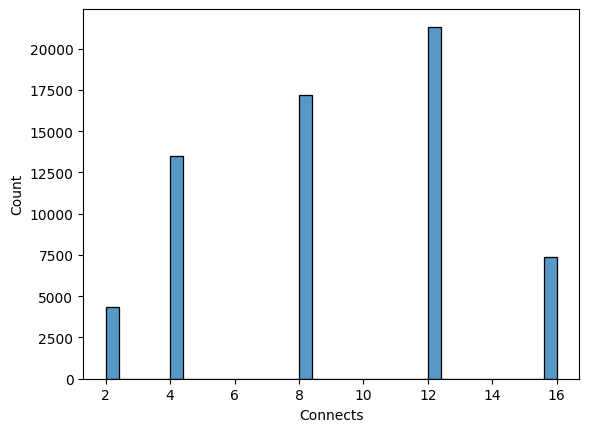

In [38]:
sns.histplot(df['Connects'])
plt.show()



In [39]:
df['Rating'].isnull().sum()

np.int64(33244)

In [40]:
df.drop(['Rating'],axis=1, inplace=True)


In [41]:
df.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent,Client_Country,Connects,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Visualization,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Power BI,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment unverified,NaN,1,0.0,United States,12.0,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Tableau,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Excel,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft PowerPoint,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,https://www.upwork.com/nx/jobs/search/?ontolog...,Analytics,https://www.upwork.com/nx/jobs/search/?ontolog...,Visualization,NaN,NaN,Less than 5,Payment verified,NaN,1,100.0,Canada,8.0,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200.0,United States,12.0,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200000.0,Canada,12.0,26.0,Hourly,NaN,67.5
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,https://www.upwork.com/nx/jobs/search/?ontolog...,Looker,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Snowflake,https://www.upwork.com/nx/jobs/search/?ontolog...,Accounting,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,Enterprise,1,NaN,United States,12.0,12512.0,Hourly,NaN,NaN


,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent,Client_Country,Connects,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Visualization,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Power BI,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment unverified,NaN,1,0.0,United States,12.0,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Tableau,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Excel,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft PowerPoint,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,https://www.upwork.com/nx/jobs/search/?ontolog...,Analytics,https://www.upwork.com/nx/jobs/search/?ontolog...,Visualization,NaN,NaN,Less than 5,Payment verified,NaN,1,100.0,Canada,8.0,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200.0,United States,12.0,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,NaN,1,200000.0,Canada,12.0,26.0,Hourly,NaN,67.5
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,https://www.upwork.com/nx/jobs/search/?ontolog...,Looker,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Snowflake,https://www.upwork.com/nx/jobs/search/?ontolog...,Accounting,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5,Payment verified,Enterprise,1,NaN,United States,12.0,12512.0,Hourly,NaN,NaN


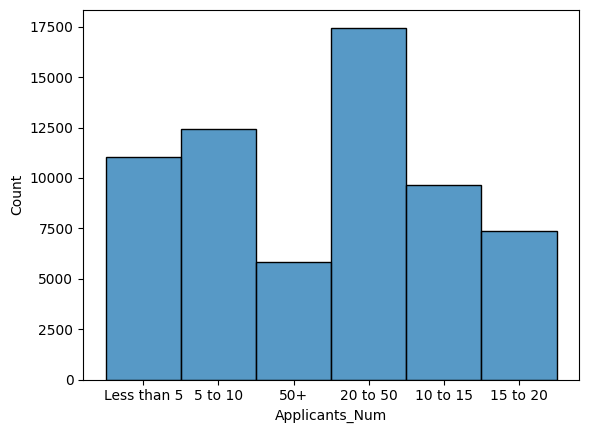

In [42]:
sns.histplot(df['Applicants_Num'])

#we can cap the values at 1000 if necessary

df.head()

we are going to replace the values with the average. 

so 'Less than 5' will be replaced with 2.5

'5 to 10' will be replaced with 7.5

'10 to 15' will be replaced with 12.5

'15 to 20' will be replaced with 17.5

'20 to 50' will be replaced with 35

More than 50 will take 50



In [43]:
df.loc[df['Applicants_Num'] == 'Less than 5', 'Applicants_Num'] = 2.5
df.loc[df['Applicants_Num'] == '5 to 10', 'Applicants_Num'] = 7.5
df.loc[df['Applicants_Num'] == '10 to 15', 'Applicants_Num'] = 12.5
df.loc[df['Applicants_Num'] == '15 to 20', 'Applicants_Num'] = 17.5
df.loc[df['Applicants_Num'] == '20 to 50', 'Applicants_Num'] = 35
df.loc[df['Applicants_Num'] == 'More than 50', 'Applicants_Num'] = 50


df.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,Category2_URL_search,Category_2,Category3_URL_search,Category_3,Category4_URL_search,Category_4,Category5_URL_search,Category_5,Category6_URL_search,Category_6,Category7_URL_search,Category_7,Category8_URL_search,Category_8,Category9_URL_search,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Freelancers_Num,Spent,Client_Country,Connects,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Visualization,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Power BI,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment unverified,NaN,1,0.0,United States,12.0,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Tableau,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft Excel,https://www.upwork.com/nx/jobs/search/?ontolog...,Microsoft PowerPoint,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,https://www.upwork.com/nx/jobs/search/?ontolog...,Analytics,https://www.upwork.com/nx/jobs/search/?ontolog...,Visualization,NaN,NaN,2.5,Payment verified,NaN,1,100.0,Canada,8.0,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,NaN,1,200.0,United States,12.0,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,NaN,1,200000.0,Canada,12.0,26.0,Hourly,NaN,67.5
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,https://www.upwork.com/nx/jobs/search/?ontolog...,Looker,https://www.upwork.com/nx/jobs/search/?ontolog...,SQL,https://www.upwork.com/nx/jobs/search/?ontolog...,Snowflake,https://www.upwork.com/nx/jobs/search/?ontolog...,Accounting,https://www.upwork.com/nx/jobs/search/?ontolog...,Python,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,Enterprise,1,NaN,United States,12.0,12512.0,Hourly,NaN,NaN


In [44]:
df.drop(columns=['Freelancers_Num'], inplace=True)
#we can cap the values at 100 if necessary


In [45]:
df.drop(columns=[ 'Posted_from', 'Time_Limitation', 'Job_URL', 'Category1_URL_search', 'Category2_URL_search', 'Category3_URL_search', 'Category4_URL_search', 'Category5_URL_search', 'Category6_URL_search', 'Category7_URL_search', 'Category8_URL_search', 'Category9_URL_search' ], inplace=True)

In [46]:
df.head()

,Job Title,EX_level_demand,Search_Keyword,Description,Category_1,highlight,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Applicants_Num,Payment_Situation,Enterprise_Client,Spent,Client_Country,Connects,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,Expert,Data_science,Already data pooled and designed. Need to refi...,Data Analysis,data,Data Visualization,Microsoft Power BI,SQL,NaN,NaN,NaN,NaN,NaN,2.5,Payment unverified,NaN,0.0,United States,12.0,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),Intermediate,Data_science,"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,Google Data Studio,SQL,Tableau,Microsoft Excel,Microsoft PowerPoint,Python,Analytics,Visualization,NaN,2.5,Payment verified,NaN,100.0,Canada,8.0,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",Intermediate,Data_science,NITIAL PROJECT\n\nSet up Monthly Report mimick...,Report Writing,NaN,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,NaN,200.0,United States,12.0,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,Expert,Data_science,"As a first step, you will implement the instal...",Machine Learning Model,NaN,Machine Learning,Python,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,NaN,200000.0,Canada,12.0,26.0,Hourly,NaN,67.5
4,BI and Data Engineer for Upwork Finance System...,Expert,Data_science,The Upwork Finance Systems team is looking for...,Data Analysis,Data,Looker,SQL,Snowflake,Accounting,Python,NaN,NaN,NaN,2.5,Payment verified,Enterprise,NaN,United States,12.0,12512.0,Hourly,NaN,NaN


In [47]:
df['Client_Country'].fillna('United States', inplace=True)



/var/folders/7_/ldhwzhy97q3_dwy4nqwpndt00000gn/T/ipykernel_24900/913205304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Client_Country'].fillna('United States', inplace=True)


In [48]:
df.drop(columns=['Enterprise_Client'], inplace=True)

<Axes: xlabel='EX_level_demand', ylabel='Count'>

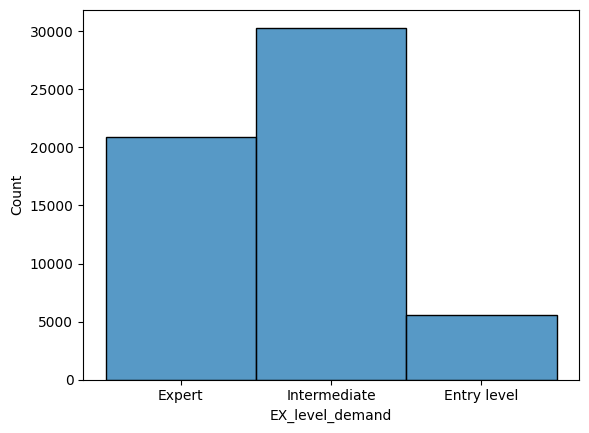

In [49]:
sns.histplot(df['EX_level_demand'])


In [50]:
df['EX_level_demand'].fillna('Intermediate', inplace=True)

/var/folders/7_/ldhwzhy97q3_dwy4nqwpndt00000gn/T/ipykernel_24900/68833680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EX_level_demand'].fillna('Intermediate', inplace=True)


Value counts:
Feedback_Num
0.0    32970
1.0     4101
2.0     2539
3.0     1850
4.0     1447
Name: count, dtype: int64

Percentage of zeros: 51.69%


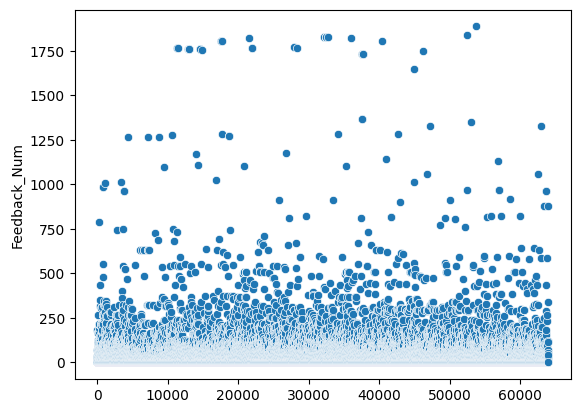

In [51]:
sns.scatterplot(df.loc[df['Feedback_Num'] <2000]['Feedback_Num'])

#print(df.loc[df['Feedback_Num'] <1000]['Feedback_Num'].mean())
#print(df.loc[df['Feedback_Num'] <1000]['Feedback_Num'].median())

#df['Feedback_Num'].describe()

print("Value counts:")
print(df['Feedback_Num'].value_counts().head())

# Check percentage of zeros
zero_percentage = (df['Feedback_Num'] == 0).mean() * 100
print(f"\nPercentage of zeros: {zero_percentage:.2f}%")


In [52]:
df.loc[df['Feedback_Num'] > 1750, 'Feedback_Num'] = 1750


In [55]:
df['Job Title'].head(20)

0                         Power bi specialist freelance
1               Case Study (on-demand delivery startup)
2     File Maker Pro Reports, Charts, Query and Ongo...
3             Implementation of EleutherAI/gpt-neox-20b
4     BI and Data Engineer for Upwork Finance System...
5     Computer vision / machine learning: synthetic ...
6                              Expert in Data Analytics
7        Data Analytics Expert for Educational Exercise
8                         Azure Data Factory specialist
9     Implementation of algorithm for multilingual data
10        Descarga e Interrelación entre Bases de Datos
11                        Linear regression with Matlab
12    Culture Survey data analysis and theme extraction
13    Integrate Bank Balance and Transaction Data in...
14        Create a face model file for stable diffusion
15      Scrape Data from our Google Maps into CSV Excel
16                            AI enabled Chat Interface
17    Programmer and expert training AI models (

In [61]:
missing = df.isnull().sum()

print(missing)

Job Title                1
EX_level_demand          0
Search_Keyword           0
Description              1
Category_1             442
highlight            13787
Category_2            4048
Category_3            8931
Category_4           16367
Category_5           24317
Category_6           32574
Category_7           38671
Category_8           43412
Category_9           47355
Applicants_Num           0
Payment_Situation        0
Spent                 1627
Client_Country           0
Connects                 0
Feedback_Num             0
Payment_type             0
Job_Cost             43768
Hourly_Rate          37282
dtype: int64


<Axes: ylabel='Spent'>

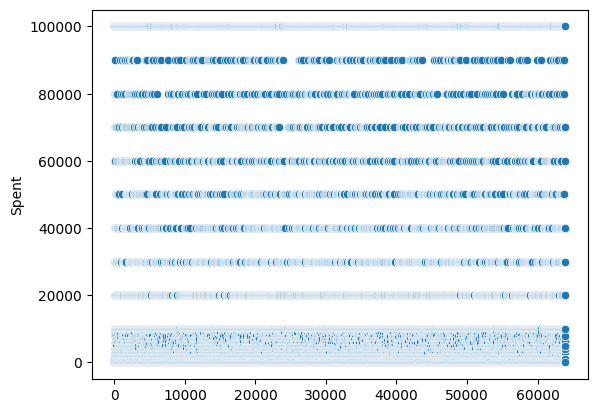

In [73]:

#sns.scatterplot(df.loc[df['Spent'] > 100000]['Spent'])
df.loc[df['Spent'] > 100000, 'Spent'] = 100000
sns.scatterplot(df['Spent'])


In [78]:
imputer = SimpleImputer(strategy='median')
df['Spent'] = imputer.fit_transform(df[['Spent']])

display(df.isnull().sum())


Job Title                1
EX_level_demand          0
Search_Keyword           0
Description              1
Category_1             442
highlight            13787
Category_2            4048
Category_3            8931
Category_4           16367
Category_5           24317
Category_6           32574
Category_7           38671
Category_8           43412
Category_9           47355
Applicants_Num           0
Payment_Situation        0
Spent                    0
Client_Country           0
Connects                 0
Feedback_Num             0
Payment_type             0
Job_Cost             43768
Hourly_Rate          37282
dtype: int64

In [81]:
df.loc[df['Job_Cost'].isnull() & df['Hourly_Rate'].isnull()].shape

#We will drop all 17266 cases where we have no price data
df.drop(df.loc[df['Job_Cost'].isnull() & df['Hourly_Rate'].isnull()].index, inplace=True)



In [84]:
df.to_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Preprocessing/Feature Cleaners/Numeric_Cleaned_Sol.csv', index=False)